In [24]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", FutureWarning)


df = pd.read_csv("C:/Users/HP/Desktop/HR ATTRITION PROJECT/data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Quick overview of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# USE CASE 1
### Which Department Has the Highest Attrition Rate?

In [36]:
# Convert Attrition to binary: Yes = 1, No = 0 in order to use .mean()
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

In [21]:
# Group by Department and calculate attrition rate
department_attrition = df.groupby("Department")["Attrition"].mean().sort_values(ascending=False).reset_index()

In [22]:
department_attrition

,Department,Attrition
0,Sales,0.206278
1,Human Resources,0.190476
2,Research & Development,0.138398


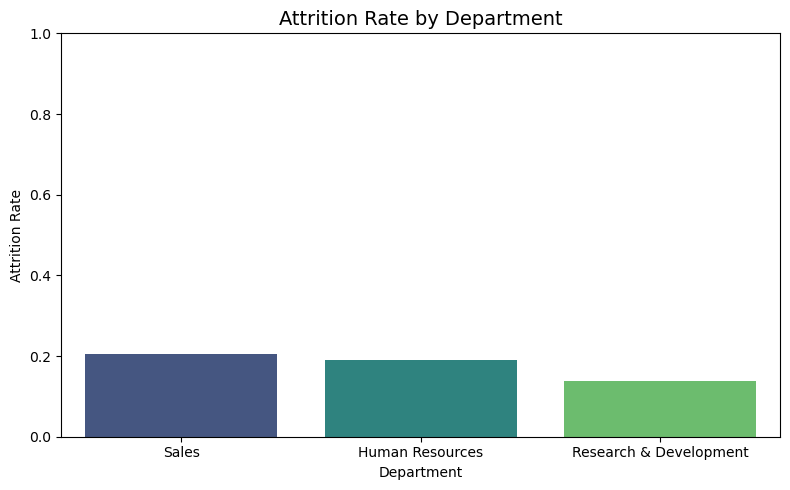

In [35]:
# Plot with Department on x-axis
plt.figure(figsize=(8, 5))
sns.barplot(data=department_attrition, x="Department", y="Attrition", palette="viridis")

plt.title("Attrition Rate by Department", fontsize=14)
plt.xlabel("Department")
plt.ylabel("Attrition Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### 📊 Insight: Department with the Highest Attrition Rate

After analyzing the attrition rates across departments, I found:

- The **Sales** department has the **highest attrition rate** (about 20.6%).
- **Human Resources** follows closely with an attrition rate of about 19%.
- The **Research & Development** department has the **lowest attrition rate** (about 13.8%).

📌 **Conclusion**: The Sales department has the highest number of employees leaving the company. This may be due to work pressure, job dissatisfaction, or other role-related challenges, and it might need closer attention to improve employee retention.


# USE CASE 2
### Is there a strong relationship between job satisfaction and attrition?


In [43]:
df["JobSatisfaction"] = df["JobSatisfaction"].map({1: "Low", 2: "Medium", 3: "High", 4: "Very High"})


In [46]:
# Convert to ordered categorical for correct bar order
df["JobSatisfaction"] = pd.Categorical(
    df["JobSatisfaction"],
    categories=["Low", "Medium", "High", "Very High"],
    ordered=True
)

In [47]:
# Group by JobSatisfaction and calculate mean Attrition
job_sat_attrition = df.groupby("JobSatisfaction")["Attrition"].mean().reset_index()

In [48]:
job_sat_attrition

,JobSatisfaction,Attrition
0,Low,0.228374
1,Medium,0.164286
2,High,0.165158
3,Very High,0.113290


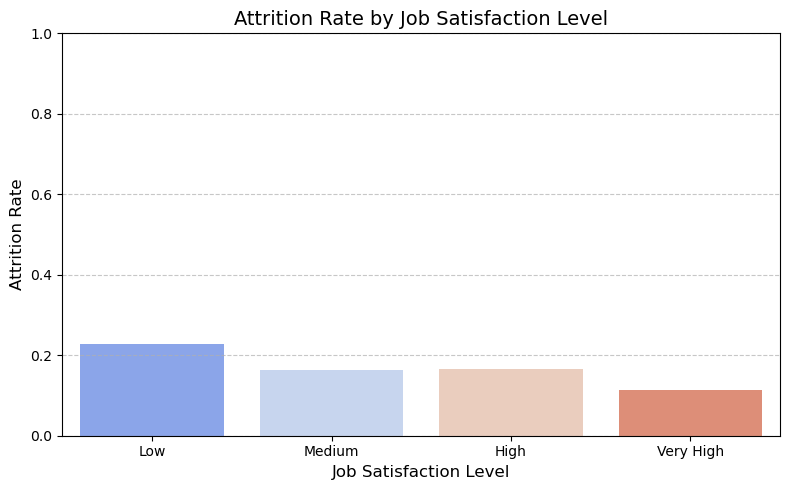

In [49]:
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=job_sat_attrition, x="JobSatisfaction", y="Attrition", palette="coolwarm")

plt.title("Attrition Rate by Job Satisfaction Level", fontsize=14)
plt.xlabel("Job Satisfaction Level", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 🔍 Insight: Job Satisfaction & Attrition

My analysis shows a clear trend:

- Employees with **Low** job satisfaction have the **highest attrition rate**.
- Those with **Very High** satisfaction have the **lowest attrition rate**.

📌 **Conclusion**: There is a strong negative relationship between job satisfaction and attrition. Boosting satisfaction may significantly reduce employee turnover.


# USE CASE 3
### Does Overtime or work-life balance correlate with attrition?


#### Overtime vs Attrition

In [50]:
# Grouping and calculating mean attrition for Overtime
overtime_attrition = df.groupby("OverTime")["Attrition"].mean().reset_index()

In [51]:
overtime_attrition

,OverTime,Attrition
0,No,0.104364
1,Yes,0.305288


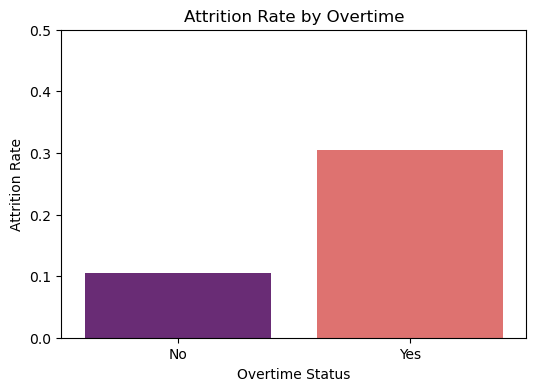

In [52]:
# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(data=overtime_attrition, x="OverTime", y="Attrition", palette="magma")
plt.title("Attrition Rate by Overtime")
plt.ylabel("Attrition Rate")
plt.xlabel("Overtime Status")
plt.ylim(0, 0.5)
plt.show()

### 📌 Insight on Overtime and Attrition
There is a strong correlation between overtime and employee attrition.
Employees who work overtime have an attrition rate of 30.5%, while those who do not work overtime have a much lower rate of 10.4%.
This clearly suggests that working overtime is associated with a higher likelihood of leaving the company.

#### Work-Life Balance vs Attrition

In [53]:
df["WorkLifeBalance"] = df["WorkLifeBalance"].map({
    1: "Bad", 2: "Good", 3: "Better", 4: "Best"
})

In [57]:
# Set category order
df["WorkLifeBalance"] = pd.Categorical(
    df["WorkLifeBalance"],
    categories=["Bad", "Good", "Better", "Best"],
    ordered=True
)

In [58]:
wlb_attrition = df.groupby("WorkLifeBalance")["Attrition"].mean().reset_index()

In [59]:
wlb_attrition

,WorkLifeBalance,Attrition
0,Bad,0.312500
1,Good,0.168605
2,Better,0.142217
3,Best,0.176471


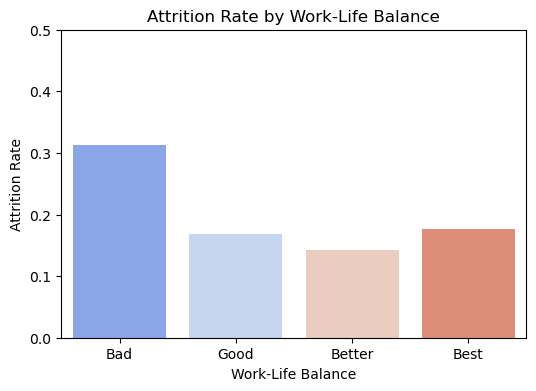

In [60]:
plt.figure(figsize=(6, 4))
sns.barplot(data=wlb_attrition, x="WorkLifeBalance", y="Attrition", palette="coolwarm")
plt.title("Attrition Rate by Work-Life Balance")
plt.ylabel("Attrition Rate")
plt.xlabel("Work-Life Balance")
plt.ylim(0, 0.5)
plt.show()


### 📌 Insight on Work-Life Balance and Attrition
The data also shows a relationship between work-life balance and attrition.
Employees who rated their work-life balance as "Bad" have the highest attrition rate at 31.3%, compared to lower rates among those with "Good", "Better", or "Best" ratings (ranging from 14% to 17%).
This indicates that employees with poor work-life balance are more likely to leave, reinforcing the importance of a healthy work environment.

# USE CASE 4
### Are certain roles, age groups, or salary bands more at risk?

#### Job Role vs. Attrition

In [61]:
# Attrition by Job Role
job_role_attrition = df.groupby("JobRole")["Attrition"].mean().sort_values(ascending=False).reset_index()

In [62]:
job_role_attrition

,JobRole,Attrition
0,Sales Representative,0.397590
1,Laboratory Technician,0.239382
2,Human Resources,0.230769
3,Sales Executive,0.174847
4,Research Scientist,0.160959
5,Manufacturing Director,0.068966
6,Healthcare Representative,0.068702
7,Manager,0.049020
8,Research Director,0.025000


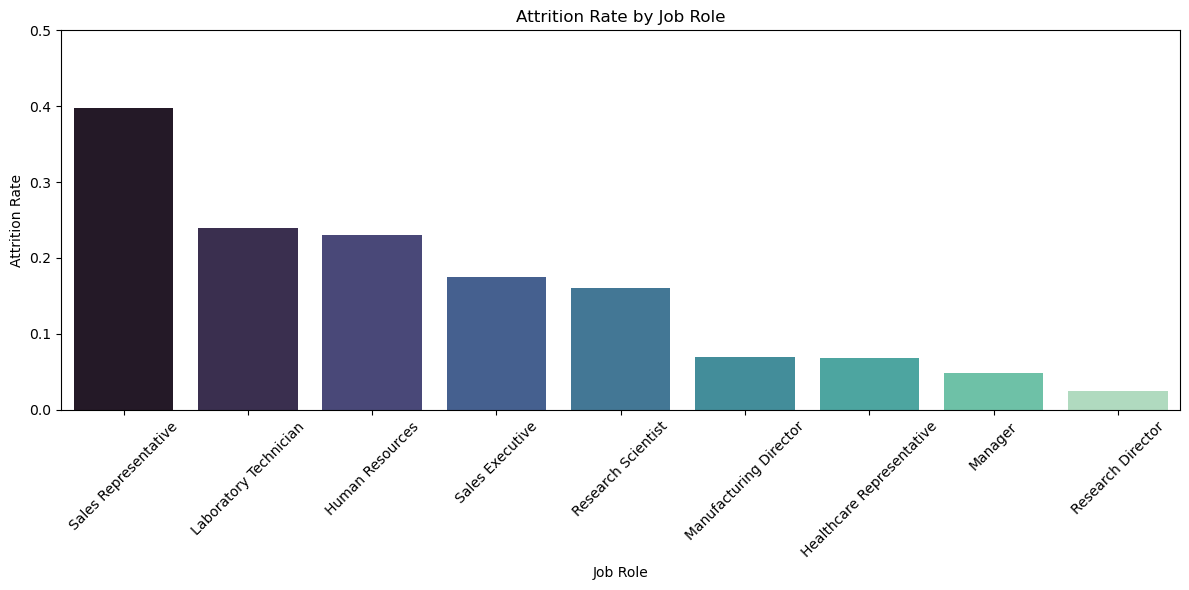

In [66]:
# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=job_role_attrition, x="JobRole", y="Attrition", palette="mako")
plt.title("Attrition Rate by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=45)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

#### Age Group vs. Attrition

In [72]:
# let's know the min and max age in the dataset
df["Age"].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [67]:
# Create Age Groups
df["AgeGroup"] = pd.cut(df["Age"], bins=[17, 25, 35, 45, 60], labels=["18-25", "26-35", "36-45", "46-60"])

In [68]:
# Attrition by Age Group
age_group_attrition = df.groupby("AgeGroup")["Attrition"].mean().reset_index()

In [69]:
age_group_attrition

,AgeGroup,Attrition
0,18-25,0.357724
1,26-35,0.191419
2,36-45,0.091880
3,46-60,0.124542


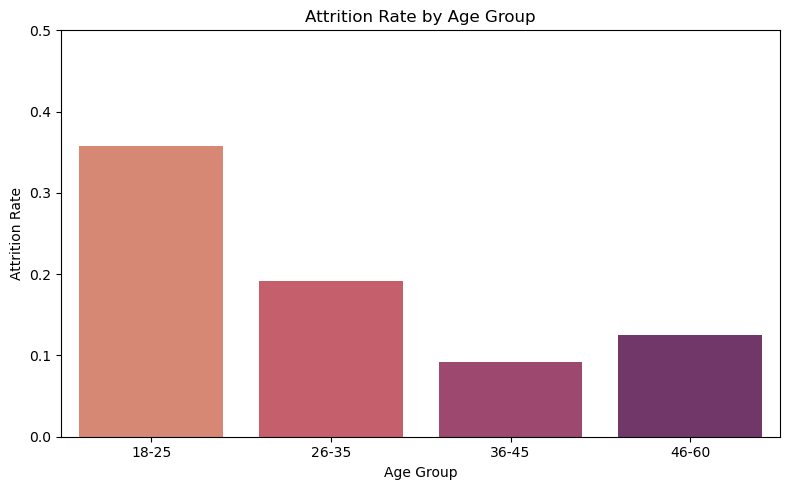

In [70]:
# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=age_group_attrition, x="AgeGroup", y="Attrition", palette="flare")
plt.title("Attrition Rate by Age Group")
plt.ylabel("Attrition Rate")
plt.xlabel("Age Group")
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

#### Salary Bands

In [73]:
# Create salary bands using quantiles
df["SalaryBand"] = pd.qcut(df["MonthlyIncome"], q=4, labels=["Low", "Medium", "High", "Very High"])


In [77]:
# Group by SalaryBand and calculate mean attrition
salary_attrition = df.groupby("SalaryBand")["Attrition"].mean().reset_index()
salary_attrition

,SalaryBand,Attrition
0,Low,0.292683
1,Medium,0.142077
2,High,0.106267
3,Very High,0.103261


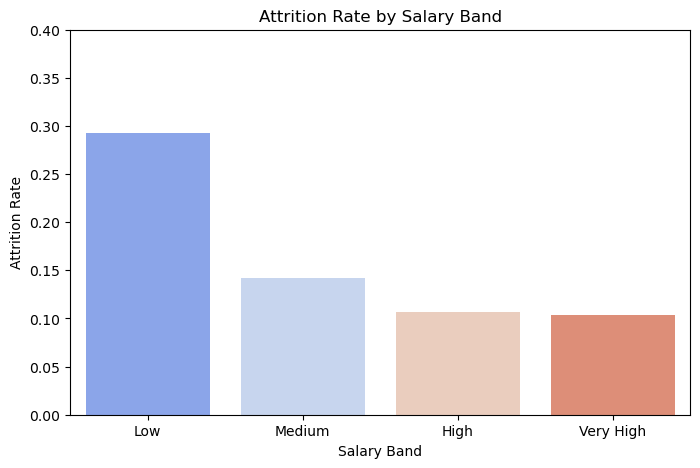

In [76]:
# Barplot of attrition by salary band
plt.figure(figsize=(8, 5))
sns.barplot(data=salary_attrition, x="SalaryBand", y="Attrition", palette="coolwarm")
plt.title("Attrition Rate by Salary Band")
plt.xlabel("Salary Band")
plt.ylabel("Attrition Rate")
plt.ylim(0, 0.4)
plt.show()

### 📌 Insights

💼 Job Role
Employees in the Sales Representative role are most at risk, with an attrition rate of 39.8%, followed by Laboratory Technicians and Human Resources staff. In contrast, Research Directors and Managers show the lowest attrition rates.
This suggests that employees in frontline or support roles may be more prone to leaving than those in senior or specialized positions.

👥 Age Group
The 18–25 age group is at the highest risk, with an attrition rate of 35.8%. Risk significantly declines in older age brackets, with the 36–45 group being the least likely to leave.
Younger employees may be more likely to seek new opportunities or be less settled in their roles.

💰 Salary Band
Attrition is highest in the Low salary band (29.3%) and steadily decreases across higher salary levels, dropping to just 10.3% in the Very High band.
Lower-paid employees are more at risk of attrition, likely due to financial dissatisfaction or better offers elsewhere.